# Machine Learning Assignment Homework 2: Tree-based Models

## Introduction
In this notebook, we will create a classification tree from scratch and use a decision-tree based ensemble Machine Learning algorithm known as Boosting, particularly XGBoost (eXtreme Gradient Boosting) to improve predictive performance.  
The notebook will cover the following major steps:
- Data Processing
- Exploratory Data Analysis
- Classification Tree Implementation
- Boosting (XGBoost)
- Result Analysis and Inference

## Data Processing

#### Data Loading

In [25]:
import os
import pandas as pd

# Current working directory
cwd = os.getcwd()

# Relative paths
data_train_path = os.path.join(cwd, '..', 'data', 'data_train-1.csv')
data_test_path = os.path.join(cwd, '..', 'data', 'data_test-1.csv')

# Load the training data
data_train = pd.read_csv(data_train_path)

# Load the test data
data_test = pd.read_csv(data_test_path)

#### Data Split

In [26]:
from sklearn.model_selection import train_test_split

# Split the data_train into data_train and data_valid (80% train, 20% validation)
data_train, data_valid = train_test_split(data_train, test_size=0.2, random_state=42)

In [27]:
# Display the first 5 rows
data_train.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
140,140,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
433,433,LP002341,Female,No,1,Graduate,No,2600,0.0,160.0,360.0,1.0,Urban,N
416,416,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
489,489,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
25,25,LP001206,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y


In [28]:
# Print the shape of the data
print(f"\nShape of the training data: {data_train.shape}")
print(f"Column names: {data_train.columns.to_list()}")

print(f"\nShape of the validation data: {data_valid.shape}")
print(f"Column names: {data_valid.columns.to_list()}")

print(f"\nShape of the test data: {data_test.shape}")
print(f"Column names: {data_test.columns.to_list()}")


Shape of the training data: (392, 14)
Column names: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Shape of the validation data: (99, 14)
Column names: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Shape of the test data: (123, 13)
Column names: ['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


#### Data Cleaning

In [29]:
# Drop the 'Unnamed: 0' index column
data_train.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)
data_valid.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)
data_test.drop(columns=['Unnamed: 0', 'Loan_ID'], inplace=True)

# Check for missing values
missing_values = data_train.isnull().sum()
print("Number of missing values for each column in the training data:")
print(missing_values)
print(f"Total number of missing values in the train dataset: {missing_values.sum()}\n")

missing_values = data_valid.isnull().sum()
print("Number of missing values for each column in the validation data:")
print(missing_values)
print(f"Total number of missing values in the validation dataset: {missing_values.sum()}\n")

missing_values = data_test.isnull().sum()
print("Number of missing values for each column in the test data:")
print(missing_values)
print(f"Total number of missing values in the test dataset: {missing_values.sum()}")

Number of missing values for each column in the training data:
Gender               10
Married               2
Dependents           10
Education             0
Self_Employed        22
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term      7
Credit_History       28
Property_Area         0
Loan_Status           0
dtype: int64
Total number of missing values in the train dataset: 94

Number of missing values for each column in the validation data:
Gender                2
Married               1
Dependents            3
Education             0
Self_Employed         7
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            2
Loan_Amount_Term      5
Credit_History       15
Property_Area         0
Loan_Status           0
dtype: int64
Total number of missing values in the validation dataset: 35

Number of missing values for each column in the test data:
Gender               1
Married              0
Dependents           2
Education            0


In [30]:
# Drop rows with missing data in original dataframe using inplace=True
data_train.dropna(inplace=True)
print(f"Shape of the train data after dropping missing data: {data_train.shape}")

data_valid.dropna(inplace=True)
print(f"Shape of the validation data after dropping missing data: {data_valid.shape}")

data_test.dropna(inplace=True)
print(f"Shape of the test data after dropping missing data: {data_test.shape}")

Shape of the train data after dropping missing data: (307, 12)
Shape of the validation data after dropping missing data: (66, 12)
Shape of the test data after dropping missing data: (107, 11)


In [31]:
# Display the first 5 rows
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
433,Female,No,1,Graduate,No,2600,0.0,160.0,360.0,1.0,Urban,N
416,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
489,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
25,Male,Yes,3+,Graduate,No,3029,0.0,99.0,360.0,1.0,Urban,Y
461,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


#### Feature and Label Extraction

In [32]:
# Extract the features and the label
X_train = data_train.drop(columns=['Loan_Status'], inplace=False)
y_train = data_train['Loan_Status']

X_valid = data_train.drop(columns=['Loan_Status'], inplace=False)
y_valid = data_train['Loan_Status']

X_test = data_test

print(f"Features: {X_train.columns.tolist()}")
print(f"Label: {y_train.name}")

Features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Label: Loan_Status


In [33]:
# Identify non-numerical columns
non_numerical_columns = X_train.select_dtypes(include=['object']).columns
print(f"Non-numerical columns: {non_numerical_columns.tolist()}")

# Apply manual Label Encoding for each non-numerical column
label_encoders = {}
for column in non_numerical_columns:
    # Get the unique values from the training data
    unique_values = sorted(X_train[column].unique())
    # Create a dictionary mapping each unique value to an integer
    encoding_map = {value: idx for idx, value in enumerate(unique_values)}
    
    # Apply the mapping to train, validation, and test sets
    X_train[column] = X_train[column].map(encoding_map)
    X_valid[column] = X_valid[column].map(encoding_map)
    X_test[column] = X_test[column].map(encoding_map)
    
    # Store the encoder map
    label_encoders[column] = encoding_map

print("Encoding complete. Here are the encoded values for each non-numerical column:")
for column in non_numerical_columns:
    print(f"{column}: {label_encoders[column]}")



Non-numerical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Encoding complete. Here are the encoded values for each non-numerical column:
Gender: {'Female': 0, 'Male': 1}
Married: {'No': 0, 'Yes': 1}
Dependents: {'0': 0, '1': 1, '2': 2, '3+': 3}
Education: {'Graduate': 0, 'Not Graduate': 1}
Self_Employed: {'No': 0, 'Yes': 1}
Property_Area: {'Rural': 0, 'Semiurban': 1, 'Urban': 2}


In [34]:
# Encode y if it contains non-numerical data
if y_train.dtype == 'object':
    unique_values = sorted(y_train.unique())
    y_encoding_map = {value: idx for idx, value in enumerate(unique_values)}
    
    y_train = y_train.map(y_encoding_map)
    y_valid = y_valid.map(y_encoding_map)
    
    print(f"Target encoding complete. Here are the encoded values for y: {y_encoding_map}")

Target encoding complete. Here are the encoded values for y: {'N': 0, 'Y': 1}


In [35]:
y_train.head()

433    0
416    0
489    0
25     1
461    1
Name: Loan_Status, dtype: int64

In [36]:
# Display the first 5 rows
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
433,0,0,1,0,0,2600,0.0,160.0,360.0,1.0,2
416,1,0,0,0,0,8750,4167.0,308.0,360.0,1.0,0
489,1,1,3,0,0,81000,0.0,360.0,360.0,0.0,0
25,1,1,3,0,0,3029,0.0,99.0,360.0,1.0,2
461,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


## Exploratory Data Analysis

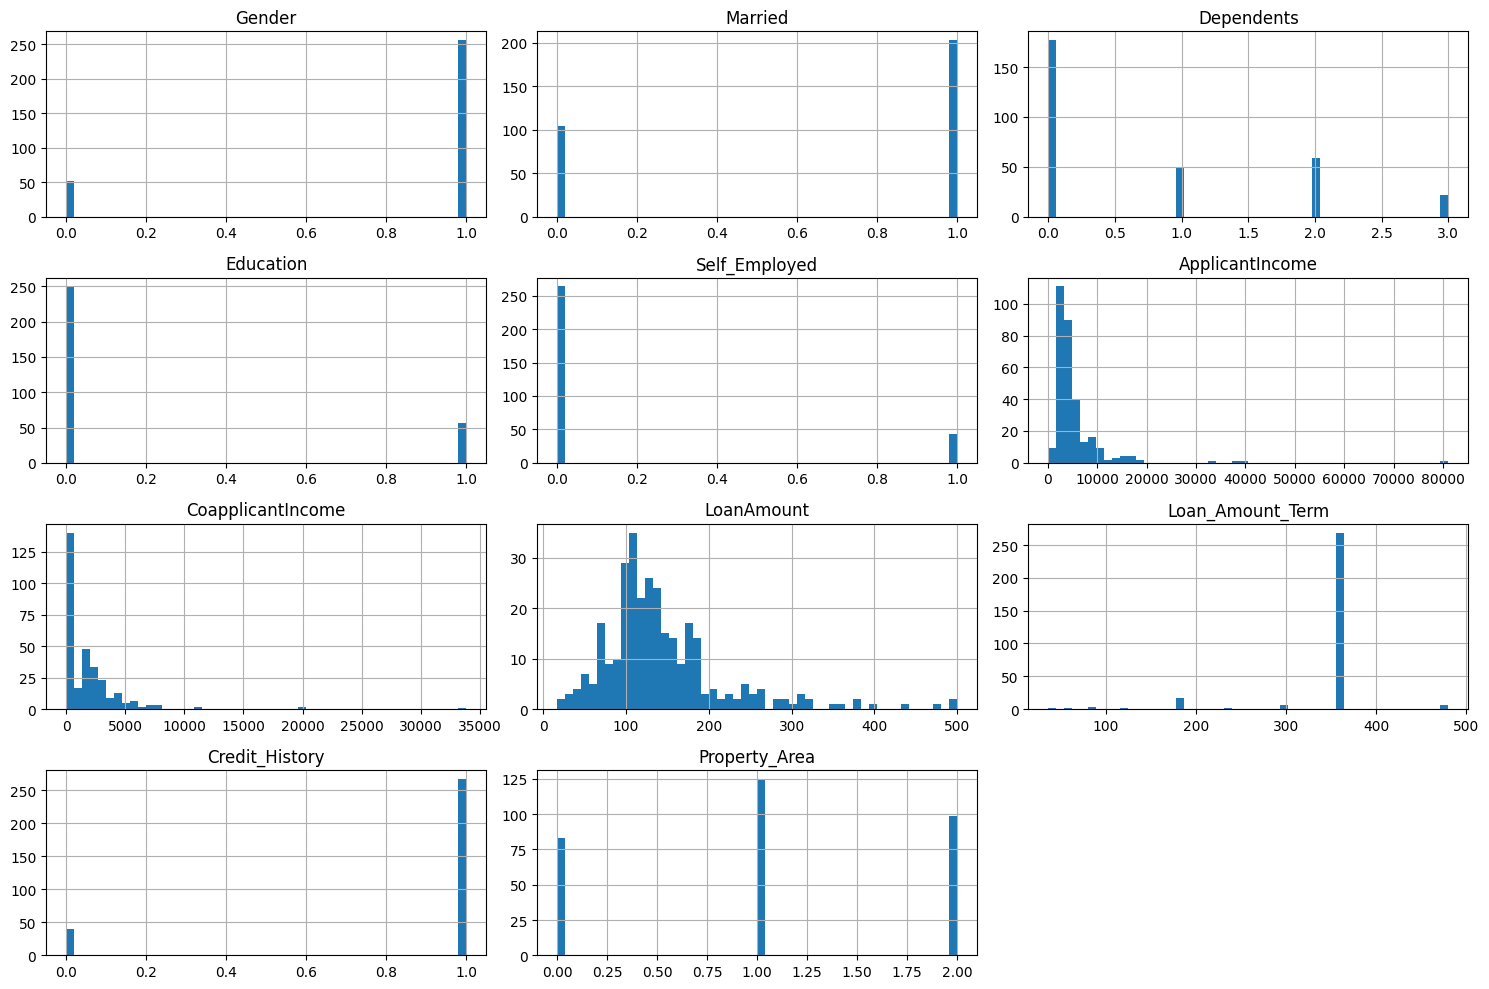

In [37]:
import matplotlib.pyplot as plt

# Plot histograms
X_train.hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Classification Tree Implementation

## Boosting (XGBoost)